In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
from matplotlib import font_manager

df = pd.read_csv('../stats.csv')

print(df[['batting_avg']].describe())

       batting_avg
count  1233.000000
mean      0.265249
std       0.028643
min       0.168000
25%       0.247000
50%       0.264000
75%       0.283000
max       0.364000


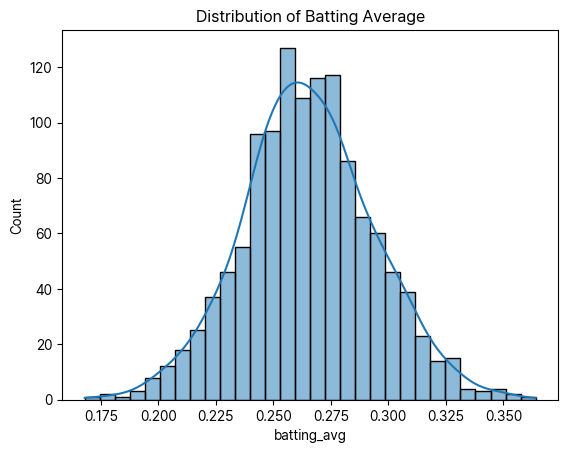

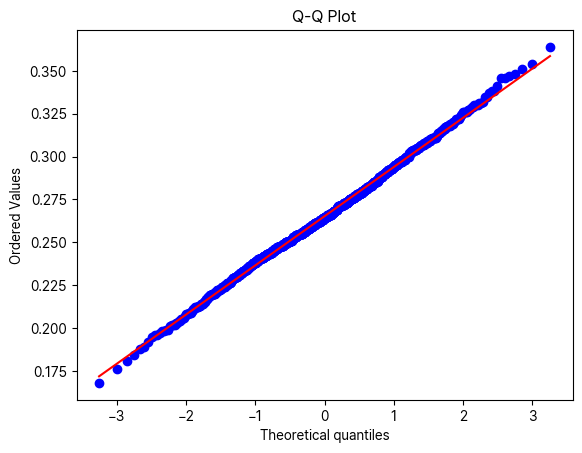

Shapiro-Wilk: 0.9984, p-value: 0.2980


In [2]:
plt.rcParams['font.family'] = 'Pretendard'

sns.histplot(df['batting_avg'], kde=True)
plt.title('Distribution of Batting Average')
plt.show()

stats.probplot(df['batting_avg'], dist='norm', plot=plt)
plt.title('Q-Q Plot')
plt.show()

stat_batting, p_value_batting = stats.shapiro(df['batting_avg'])
print(f'Shapiro-Wilk: {stat_batting:.4f}, p-value: {p_value_batting:.4f}')

In [3]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlations = df[numeric_cols].corr()['batting_avg'].sort_values(ascending=False)
correlations.drop(index='batting_avg', inplace=True)

# Correlation
print('타율과의 상관관계:')
print(correlations)

타율과의 상관관계:
xba                   0.778817
babip                 0.775256
on_base_percent       0.694081
woba                  0.677964
on_base_plus_slg      0.667085
slg_percent           0.569369
single                0.511598
hit                   0.501774
xobp                  0.433058
xwoba                 0.419843
double                0.386474
blasts_swing          0.373139
xslg                  0.371612
r_run                 0.344208
blasts_contact        0.311517
squared_up_swing      0.311377
squared_up_contact    0.308298
sweet_spot_percent    0.265662
b_rbi                 0.240137
fast_swing_rate       0.211477
triple                0.160704
ab                    0.156569
pa                    0.144747
b_foul                0.139935
xiso                  0.124172
avg_swing_speed       0.117117
exit_velocity_avg     0.112334
home_run              0.106695
swing_percent         0.105041
hard_hit_percent      0.065715
avg_hyper_speed       0.065145
sprint_speed          0.0610

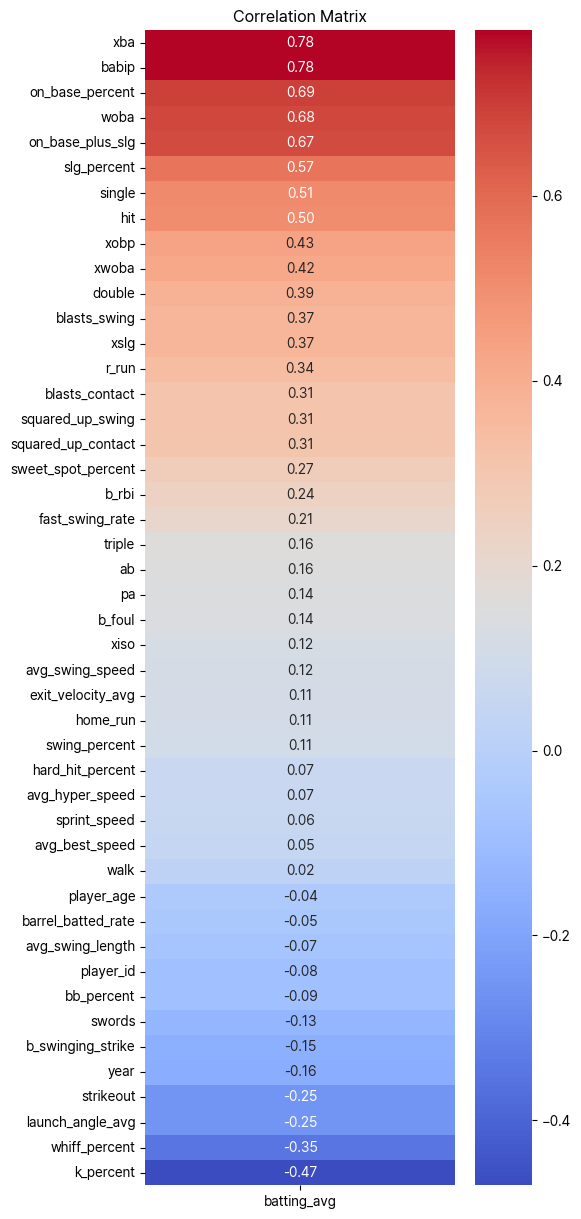

In [4]:
# Correlation matrix
plt.figure(figsize=(5, 15))
sns.heatmap(correlations.to_frame(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [5]:
corr_top10 = correlations.head(10)
corr_bottom10 = correlations.tail(10)

In [6]:
X = df[corr_top10.index]
y = df['batting_avg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error for model: {mse}')
print(f'R2 for model: {r2}')
print()

df['expected_batting_avg'] = model.predict(df[corr_top10.index])
df[['last_name', 'first_name']] = df['last_name, first_name'].str.split(', ', expand=True)
df['player_name'] = df['last_name'] + ', ' + df['first_name']
expected_batting_avg_table = df[['player_name', 'expected_batting_avg']].round({'expected_batting_avg': 3})

print('Expected Batting Averages for Players(Top 20):')
print(expected_batting_avg_table.sort_values(by='expected_batting_avg', ascending=False).head(20))

Mean Squared Error for model: 2.8442196806885235e-06
R2 for model: 0.9967518755760141

Expected Batting Averages for Players(Top 20):
            player_name  expected_batting_avg
589        LeMahieu, DJ                 0.363
1032       Arraez, Luis                 0.356
700          Soto, Juan                 0.353
83         LeMahieu, DJ                 0.346
206        Altuve, Jose                 0.345
587    Freeman, Freddie                 0.345
72       Murphy, Daniel                 0.342
400       Betts, Mookie                 0.342
542       Anderson, Tim                 0.341
593      Ozuna, Marcell                 0.339
1042  Acuña Jr., Ronald                 0.338
75         Altuve, Jose                 0.336
174   Blackmon, Charlie                 0.333
218     García, Avisaíl                 0.333
973    Freeman, Freddie                 0.333
656        Turner, Trea                 0.332
329      Martinez, J.D.                 0.330
526        Marte, Ketel               